In [1]:
import hytek_exctractor

result_df = hytek_exctractor.extract_hytek_results('result_pdfs','carifta_2025_results.csv')

/Users/luisweekes/Documents/Swimming/SOFT_DEV/Hytek_PDF_to_DF/hytek_exctractor.py:102: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.rstrip(')') if isinstance(x, str) else x)
/Users/luisweekes/Documents/Swimming/SOFT_DEV/Hytek_PDF_to_DF/hytek_exctractor.py:102: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.rstrip(')') if isinstance(x, str) else x)
/Users/luisweekes/Documents/Swimming/SOFT_DEV/Hytek_PDF_to_DF/hytek_exctractor.py:102: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.rstrip(')') if isinstance(x, str) else x)
/Users/luisweekes/Documents/Swimming/SOFT_DEV/Hytek_PDF_to_DF/hytek_exctractor.py:102: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.rstrip(')') if isinstance(x, str) else x)
/Users/luisweekes/Documents/Swim

In [2]:
print(result_df.head())

     Name Age                     Team Seed Time Performance Time  \
0  Reagan  13  Virgin Islands Swimming   9:38.89          9:22.27   
1  Marena  13        Trinidad & Tobago   9:46.17          9:49.52   
2    Zara  13        Trinidad & Tobago   9:54.23          9:53.57   
3  Dndn F  14                  Bahamas  10:03.47         10:02.06   
4  Lailah  13       Barbados Swim Team  10:46.29         10:14.26   

                                EVENT EVENT_NUM  PLACE GENDER AGE_GROUP  \
0  Girls 13-14 800 LC Meter Freestyle         1      1  Girls     13-14   
1  Girls 13-14 800 LC Meter Freestyle         1      2  Girls     13-14   
2  Girls 13-14 800 LC Meter Freestyle         1      3  Girls     13-14   
3  Girls 13-14 800 LC Meter Freestyle         1      4  Girls     13-14   
4  Girls 13-14 800 LC Meter Freestyle         1      5  Girls     13-14   

  DISTANCE     STROKE DISTANCEXSTROKE AGE_GROUPXGENDER  \
0      800  Freestyle    800Freestyle       13-14Girls   
1      800  Freest

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
print(result_df['Team'].unique())

['Virgin Islands Swimming' 'Trinidad & Tobago' 'Bahamas'
 'Barbados Swim Team' 'Aruba' 'Cayman Islands-ZZ'
 'Grenada National Swim Team' 'Antigua Barbuda National Team' 'Martinique'
 'Team Guadeloupe' 'Jamaica' 'Bermuda Swim Team' 'Suriname'
 'St Vincent Swim Team' 'Turks And Caicos Islands' 'Anguilla' 'Bonaire'
 'Sint Maarten' 'Curacao Aquatic Association' 'Haiti' 'Guyana'
 'Belize Aquatics Federation-ZZ' 'Jamaica A' 'Cayman Islands-ZZ A'
 'Bahamas A' 'Trinidad & Tobago A' 'Martinique A' 'Aruba A'
 'Barbados Swim Team A' 'Virgin Islands Swimming NT']


In [5]:
bim_results = result_df[(result_df['Team']== 'Barbados Swim Team') | (result_df['Team'] == 'Barbados Swim Team A')].reset_index(drop=True)
print(bim_results.head())
bim_results.to_csv('barbados_carifta_2025.csv', )

       Name Age                Team Seed Time Performance Time  \
0    Lailah  13  Barbados Swim Team  10:46.29         10:14.26   
1     Naomi  14  Barbados Swim Team  10:16.41         10:29.45   
2     Heidi  15  Barbados Swim Team   9:11.81          9:18.93   
3  Isabella  15  Barbados Swim Team   9:57.72          9:59.71   
4    Mihael  13  Barbados Swim Team  17:57.49         18:05.88   

                                EVENT EVENT_NUM  PLACE GENDER AGE_GROUP  \
0  Girls 13-14 800 LC Meter Freestyle         1      5  Girls     13-14   
1  Girls 13-14 800 LC Meter Freestyle         1      9  Girls     13-14   
2  Girls 15-17 800 LC Meter Freestyle         1      1  Girls     15-17   
3  Girls 15-17 800 LC Meter Freestyle         1      3  Girls     15-17   
4  Boys 13-14 1500 LC Meter Freestyle         2      1   Boys     13-14   

  DISTANCE     STROKE DISTANCEXSTROKE AGE_GROUPXGENDER  \
0      800  Freestyle    800Freestyle       13-14Girls   
1      800  Freestyle    800Freestyl

# Notes on what to look at: 

1. PCT of swims resulting in finals or top 8 (separate by age and gender + both )

2. Number of Finals Appearances by Age and gender, both

3. Medals by Age and gender, both. 

4. number of Finalists by stroke (Age and gender, both)

5. Average Time drop from seed to performance Age and gender, both

# 2. Number of Finals Appearances

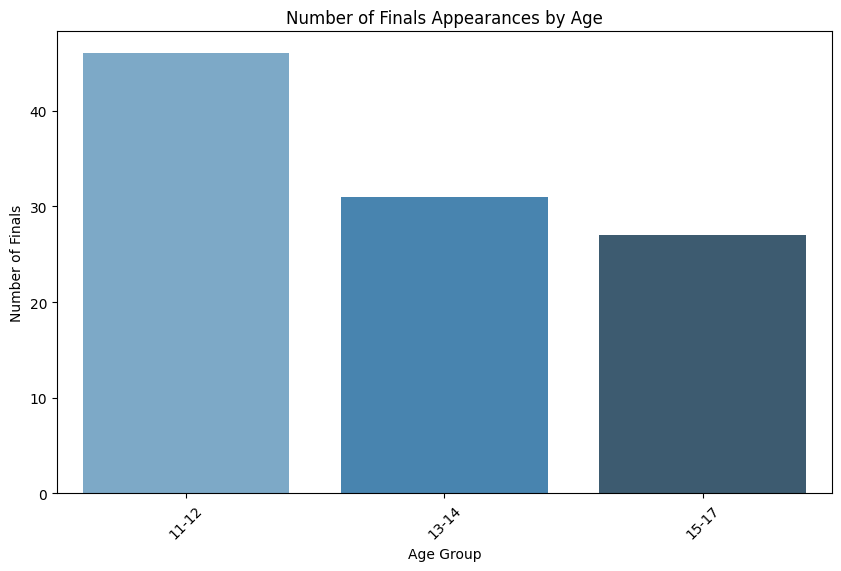

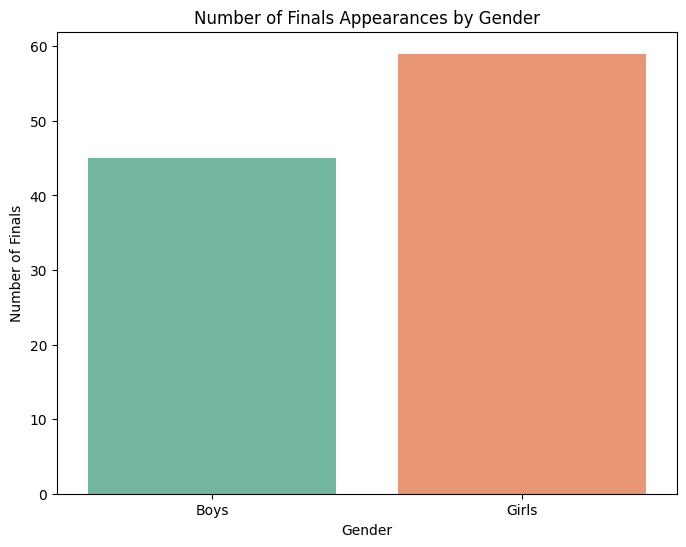

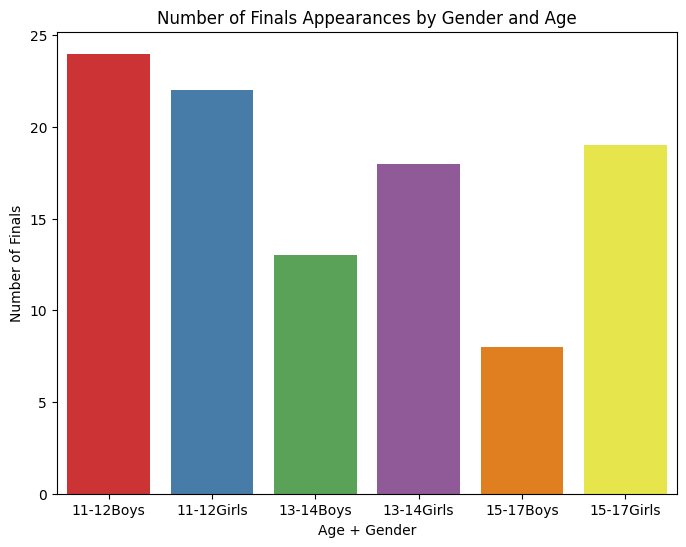

In [6]:
finals_df = bim_results[bim_results['SWIM_TYPE'] == 'Finals']

finals_by_age = finals_df.groupby('AGE_GROUP').size()
finals_by_gender = finals_df.groupby('GENDER').size()
finals_by_age_gender = finals_df.groupby('AGE_GROUPXGENDER').size()


plt.figure(figsize=(10, 6))
sns.barplot(x=finals_by_age.index, y=finals_by_age.values, palette= "Blues_d", hue= finals_by_age.index)
plt.title('Number of Finals Appearances by Age')
plt.xlabel('Age Group')
plt.ylabel('Number of Finals')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 6))
sns.barplot(x=finals_by_gender.index, y=finals_by_gender.values, palette="Set2", hue = finals_by_gender.index)
plt.title('Number of Finals Appearances by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Finals')
plt.show()


plt.figure(figsize=(8, 6))
sns.barplot(x=finals_by_age_gender.index, y=finals_by_age_gender.values, palette="Set1", hue= finals_by_age_gender.index)
plt.title('Number of Finals Appearances by Gender and Age')
plt.xlabel('Age + Gender')
plt.ylabel('Number of Finals')
plt.show()


# 3. Medals

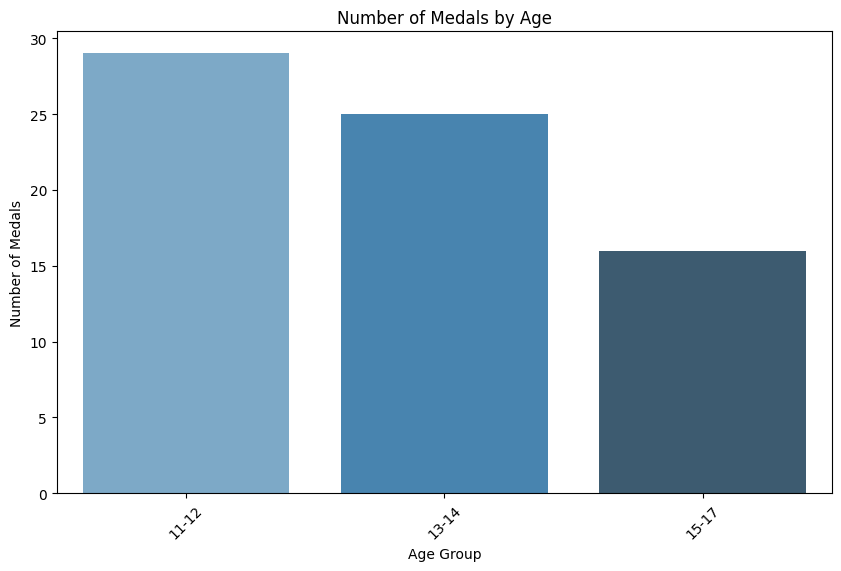

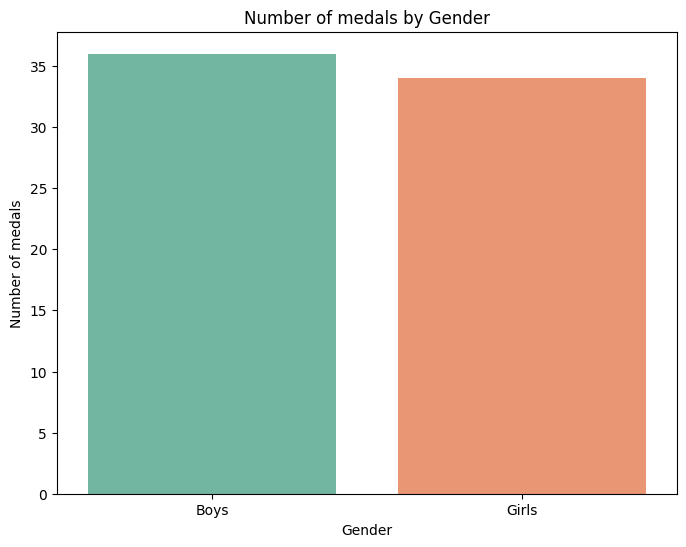

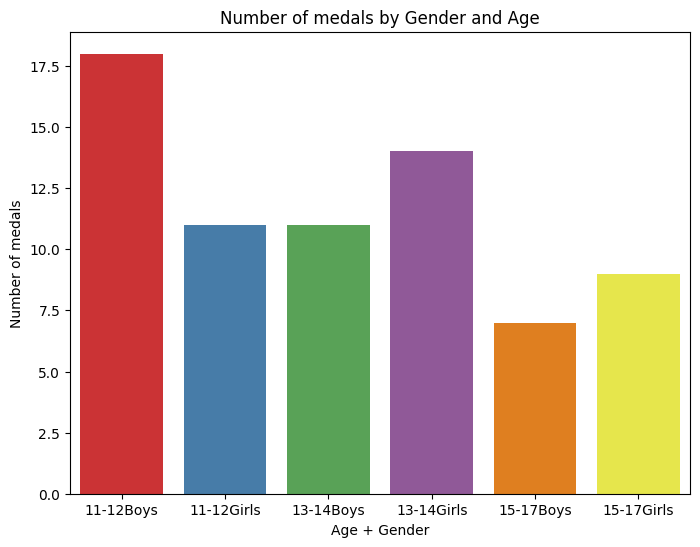

In [7]:
medals_df = bim_results[(bim_results['SWIM_TYPE'] == 'Finals') & (bim_results['PLACE'] >= 3)]

medals_by_age = medals_df.groupby('AGE_GROUP').size()
medals_by_gender = medals_df.groupby('GENDER').size()
medals_by_age_gender = medals_df.groupby('AGE_GROUPXGENDER').size()


plt.figure(figsize=(10, 6))
sns.barplot(x=medals_by_age.index, y=medals_by_age.values, palette= "Blues_d", hue= medals_by_age.index)
plt.title('Number of Medals by Age')
plt.xlabel('Age Group')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 6))
sns.barplot(x=medals_by_gender.index, y=medals_by_gender.values, palette="Set2", hue = medals_by_gender.index)
plt.title('Number of medals by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of medals')
plt.show()


plt.figure(figsize=(8, 6))
sns.barplot(x=medals_by_age_gender.index, y=medals_by_age_gender.values, palette="Set1", hue= medals_by_age_gender.index)
plt.title('Number of medals by Gender and Age')
plt.xlabel('Age + Gender')
plt.ylabel('Number of medals')
plt.show()


# 4. Finalists

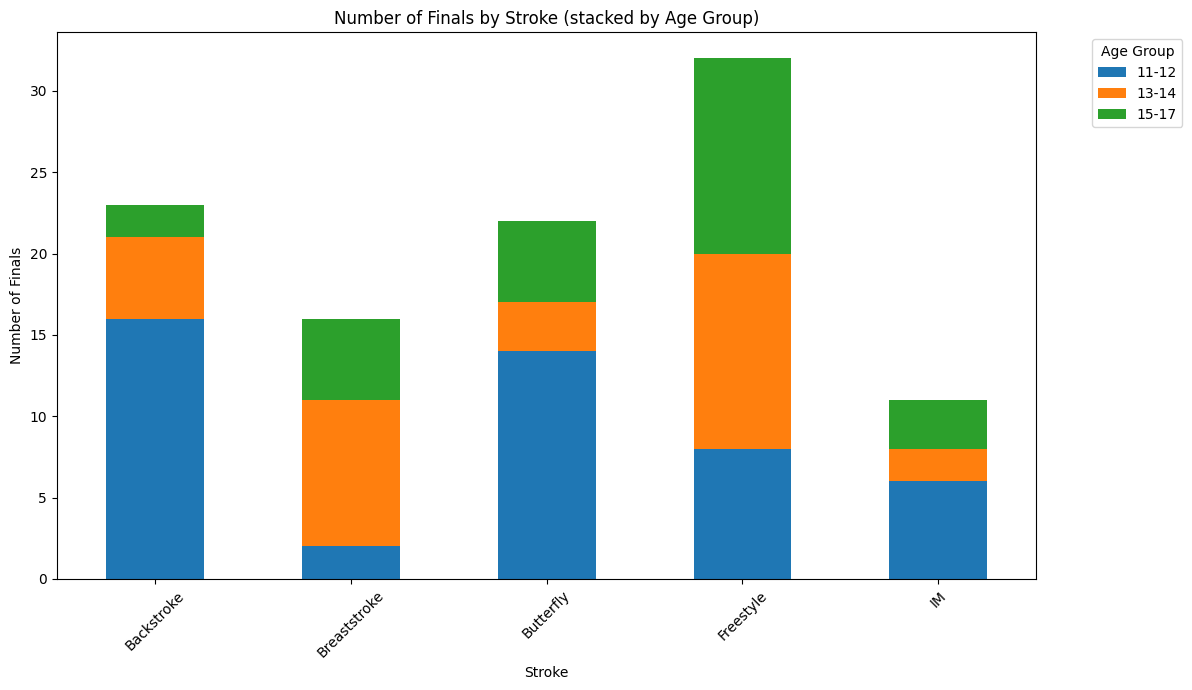

In [8]:
import matplotlib.pyplot as plt

# 1. Filter only Finals swims
finals_df = bim_results[bim_results['SWIM_TYPE'] == 'Finals']

# 2. Group by Stroke and Age Group
finals_by_stroke_age = finals_df.groupby(['STROKE', 'AGE_GROUP']).size().unstack(fill_value=0)

# 3. Plot Stacked Bar
finals_by_stroke_age.plot(kind='bar', stacked=True, figsize=(12, 7))

plt.title('Number of Finals by Stroke (stacked by Age Group)')
plt.xlabel('Stroke')
plt.ylabel('Number of Finals')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


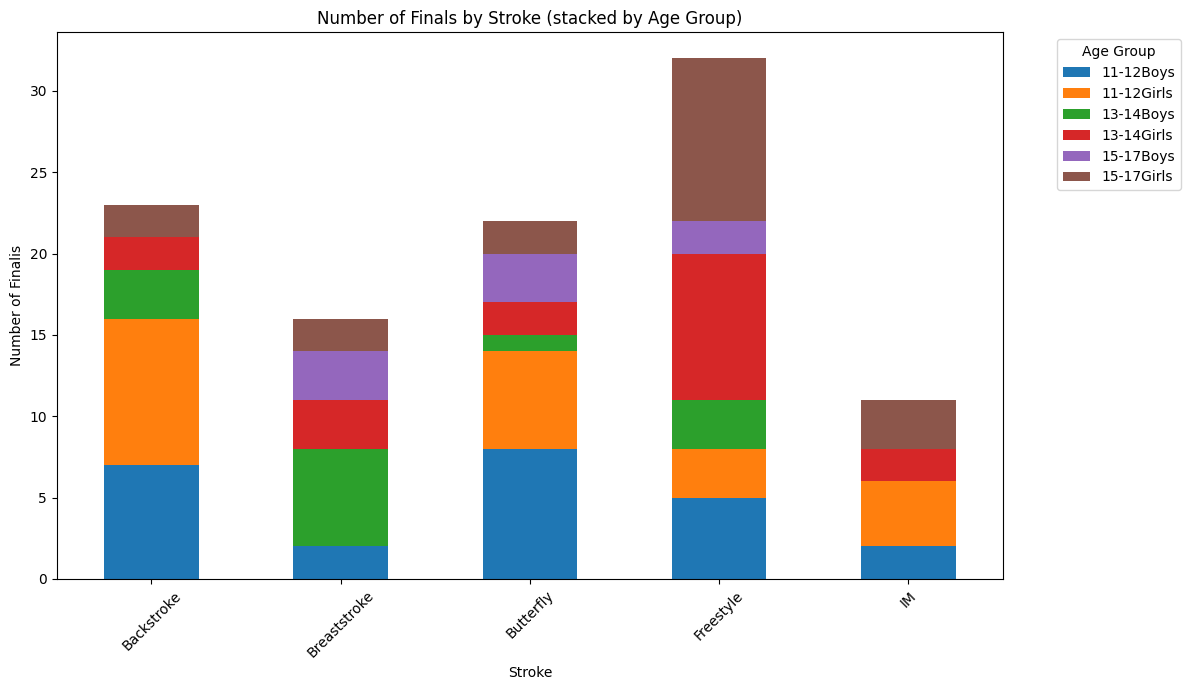

In [9]:
import matplotlib.pyplot as plt

# 1. Filter only Finals swims
finals_df = bim_results[bim_results['SWIM_TYPE'] == 'Finals']

# 2. Group by Stroke and Age Group
finals_by_stroke_age = finals_df.groupby(['STROKE', 'AGE_GROUPXGENDER']).size().unstack(fill_value=0)

# 3. Plot Stacked Bar
finals_by_stroke_age.plot(kind='bar', stacked=True, figsize=(12, 7))

plt.title('Number of Finals by Stroke (stacked by Age Group)')
plt.xlabel('Stroke')
plt.ylabel('Number of Finalis')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 5. Time Drop

AGE_GROUPXGENDER
11-12Boys    -1.215197
11-12Girls    0.024091
13-14Boys    -0.663948
13-14Girls    0.304412
15-17Boys     0.382466
15-17Girls    0.069988
Name: PCT_DROP_GAIN, dtype: float64


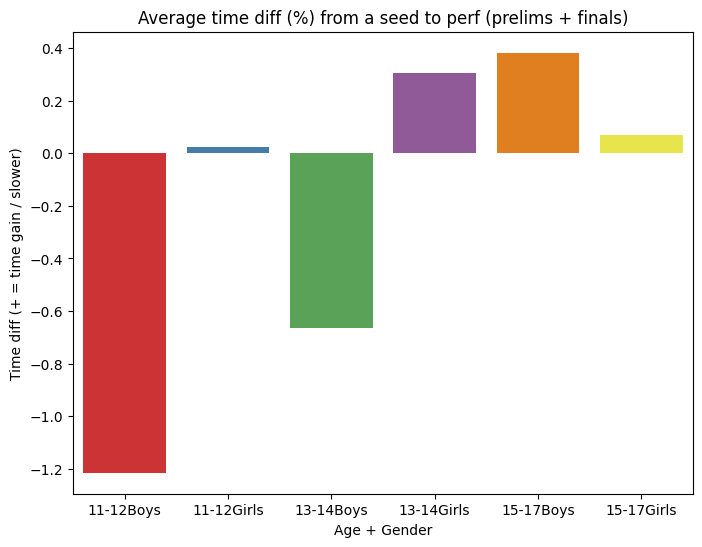

In [10]:
av_time_drop = bim_results.groupby('AGE_GROUPXGENDER')['PCT_DROP_GAIN'].mean()
print(av_time_drop)

plt.figure(figsize=(8, 6))
sns.barplot(x=av_time_drop.index, y=av_time_drop.values, palette="Set1", hue= av_time_drop.index)
plt.title('Average time diff (%) from a seed to perf (prelims + finals)')
plt.xlabel('Age + Gender')
plt.ylabel('Time diff (+ = time gain / slower)')
plt.show()